# pandas

- pandas는 오픈소스이고, BSD 라이센스 라이브러리
- 고성능의 사용이 쉬운 데이터구조와 python 프로그래밍언어를 위한 데이터분석 도구
- **pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language**
- 2008년, AQR 투자 운용 회사(Capital Management)에 다니던 Wes McKinney가 개발 시작



- 데이터프레임을 제공하여 테이블 구조의 데이터 처리를 편리하게 해준다. R의 data.frame 구조체와 같은 용도로 사용된다.
- numpy의 배열에는 모두 숫자만 들어올 수 있으나, 데이터프레임에는 임의의 타입의 데이터를 담을 수 있다

## import and set

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

## Data Structure

### DataFrame의 구성 - 자료화된 구조

<img src="http://bookdata.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png">

In [2]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
customer = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }
customer

{'Age': [24, 13, 53, 33],
 'Location': ['New York', 'Paris', 'Berlin', 'London'],
 'Name': ['John', 'Anna', 'Peter', 'Linda']}

In [3]:
a = pd.DataFrame(customer)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
a

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [4]:
# 조건에 맞는 데이터를 얻는 방법 예시로 나이가 30 이상인 경우만 출력한다
display(a[a.Age > 30])

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


## Series

### 생성

- Series는 일련의 객체를 담을 수 있는 1차원 배열 자료구조
- 색인(index)이라고 하는 배열의 데이터에 연관된 이름을 가지고 있음
- 가장 간단한 Series객체는 배열 데이터로부터 생성 할수 있음. 

첫 번쨰 컬럼|두 번째 컬럼
--|--
Index Label|Series 객체의 Value

In [5]:
from pandas import Series, DataFrame

In [6]:
import pandas as pd

In [7]:
pd.Series

pandas.core.series.Series

In [8]:
a = Series([4,7,-5,3])

In [9]:
a

0    4
1    7
2   -5
3    3
dtype: int64

In [10]:
a.values

array([ 4,  7, -5,  3], dtype=int64)

In [11]:
s = Series([10000, 2000, 30000, 40000], index=['Seatle', 'Seoul', 'San Hose', 'Beijing'])
s

Seatle      10000
Seoul        2000
San Hose    30000
Beijing     40000
dtype: int64

In [12]:
s.index

Index(['Seatle', 'Seoul', 'San Hose', 'Beijing'], dtype='object')

In [13]:
s.values

array([10000,  2000, 30000, 40000], dtype=int64)

In [14]:
s

Seatle      10000
Seoul        2000
San Hose    30000
Beijing     40000
dtype: int64

In [15]:
#배열에서 값을 선택하거나 대입할 때는 색인을 이용해서 접근
s['Seatle']

10000

In [16]:
s['Beijing']

40000

- 불리언 배열을 사용해서 값을 걸러내기

In [17]:
s[s>10000]

San Hose    30000
Beijing     40000
dtype: int64

- 산술곱셈을 수행하거나 수학함수를 적용하는 등 Numpy배열연산을 수행해도 색인-값 연결은 유지됨

In [18]:
s*2

Seatle      20000
Seoul        4000
San Hose    60000
Beijing     80000
dtype: int64

In [19]:
'Beijing' in s

True

In [20]:
'Japan' in s

False

### 2) indexing and slicing

In [21]:
s['Seoul']

2000

In [22]:
s[['Seatle', 'San Hose']]

Seatle      10000
San Hose    30000
dtype: int64

In [23]:
s[['Seatle', 'San Hose']]

Seatle      10000
San Hose    30000
dtype: int64

In [24]:
s['Seatle': 'San Hose']

Seatle      10000
Seoul        2000
San Hose    30000
dtype: int64

In [25]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [26]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [27]:
pd.isnull(obj4)


California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [28]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [29]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [30]:
obj3


Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [31]:
print(obj4)
obj3 + obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

### 3) Time Series

In [32]:
import pandas as pd

In [33]:
dates = pd.date_range('2016-05-01', '2016-05-07')
dates

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07'],
              dtype='datetime64[ns]', freq='D')

## DataFrame

### 생성

In [34]:
tmp1 = Series([80, 92, 82, 85, 97, 84, 78], index=dates)

In [35]:
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [36]:
tmp2 = Series(np.random.randint(60, 100, size=7), index=dates)

In [37]:
tmp1

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, dtype: int64

In [38]:
tmp2

2016-05-01    60
2016-05-02    71
2016-05-03    69
2016-05-04    94
2016-05-05    61
2016-05-06    62
2016-05-07    74
Freq: D, dtype: int32

In [39]:
exam = DataFrame({
        'Math': tmp1,
        'Philosophy': tmp2
    })
exam

,Math,Philosophy
2016-05-01,80,60
2016-05-02,92,71
2016-05-03,82,69
2016-05-04,85,94
2016-05-05,97,61
2016-05-06,84,62
2016-05-07,78,74


### 데이터 살펴보기

In [40]:
exam['Math']

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, Name: Math, dtype: int64

In [41]:
exam.loc['2016-05-06']

Math          84
Philosophy    62
Name: 2016-05-06 00:00:00, dtype: int64

In [42]:
exam.iloc[0]

Math          80
Philosophy    60
Name: 2016-05-01 00:00:00, dtype: int64

In [43]:
exam[['Math', 'Philosophy']]

,Math,Philosophy
2016-05-01,80,60
2016-05-02,92,71
2016-05-03,82,69
2016-05-04,85,94
2016-05-05,97,61
2016-05-06,84,62
2016-05-07,78,74


In [44]:
exam['Math'][[1, 3]]

2016-05-02    92
2016-05-04    85
Name: Math, dtype: int64

In [45]:
print('a')

a


In [46]:
exam.Math

2016-05-01    80
2016-05-02    92
2016-05-03    82
2016-05-04    85
2016-05-05    97
2016-05-06    84
2016-05-07    78
Freq: D, Name: Math, dtype: int64

In [47]:
exam.columns

Index(['Math', 'Philosophy'], dtype='object')

In [48]:
exam

,Math,Philosophy
2016-05-01,80,60
2016-05-02,92,71
2016-05-03,82,69
2016-05-04,85,94
2016-05-05,97,61
2016-05-06,84,62
2016-05-07,78,74


### 연산

In [49]:
a = exam.Math - exam.Philosophy

In [50]:
a

2016-05-01    20
2016-05-02    21
2016-05-03    13
2016-05-04    -9
2016-05-05    36
2016-05-06    22
2016-05-07     4
Freq: D, dtype: int64

In [51]:
exam['difference'] = a
exam

,Math,Philosophy,difference
2016-05-01,80,60,20
2016-05-02,92,71,21
2016-05-03,82,69,13
2016-05-04,85,94,-9
2016-05-05,97,61,36
2016-05-06,84,62,22
2016-05-07,78,74,4


In [52]:
avg = np.mean(exam, axis=1)  # axis: 1=row
avg

2016-05-01    53.333333
2016-05-02    61.333333
2016-05-03    54.666667
2016-05-04    56.666667
2016-05-05    64.666667
2016-05-06    56.000000
2016-05-07    52.000000
Freq: D, dtype: float64

### 컬럼 추가

In [53]:
exam['avg'] = avg
exam

,Math,Philosophy,difference,avg
2016-05-01,80,60,20,53.333333
2016-05-02,92,71,21,61.333333
2016-05-03,82,69,13,54.666667
2016-05-04,85,94,-9,56.666667
2016-05-05,97,61,36,64.666667
2016-05-06,84,62,22,56.000000
2016-05-07,78,74,4,52.000000


### 컬럼 이름 바꾸기

In [54]:
# rename two of the columns by using the 'rename' method
exam.rename(columns={'Math':'Mathmatics', 'avg':'Average'}, inplace=True)
exam.columns

Index(['Mathmatics', 'Philosophy', 'difference', 'Average'], dtype='object')

In [55]:
exam

,Mathmatics,Philosophy,difference,Average
2016-05-01,80,60,20,53.333333
2016-05-02,92,71,21,61.333333
2016-05-03,82,69,13,54.666667
2016-05-04,85,94,-9,56.666667
2016-05-05,97,61,36,64.666667
2016-05-06,84,62,22,56.000000
2016-05-07,78,74,4,52.000000


### 컬럼 지우기

In [56]:
# remove a single column (axis=1 refers to columns)
exam.drop('difference', axis=1, inplace=True)
exam.head()

,Mathmatics,Philosophy,Average
2016-05-01,80,60,53.333333
2016-05-02,92,71,61.333333
2016-05-03,82,69,54.666667
2016-05-04,85,94,56.666667
2016-05-05,97,61,64.666667


### 데이터 찾기

In [57]:
exam.loc['2016-05-01']

Mathmatics    80.000000
Philosophy    60.000000
Average       53.333333
Name: 2016-05-01 00:00:00, dtype: float64

In [58]:
exam.iloc[0]  # location

Mathmatics    80.000000
Philosophy    60.000000
Average       53.333333
Name: 2016-05-01 00:00:00, dtype: float64

In [59]:
exam.index >= '2016-05-03'

array([False, False,  True,  True,  True,  True,  True])

In [60]:
exam[
    (exam.index == '2016-05-03') | (exam.index == '2016-05-04')
]

,Mathmatics,Philosophy,Average
2016-05-03,82,69,54.666667
2016-05-04,85,94,56.666667


> **Q. 2016-05-03부터 2016-05-05짜리 데이터를 가져와보자.**

In [82]:
# Solution


,Math,Philosophy,avg
2016-05-03,82,75,78.5
2016-05-04,85,83,84.0
2016-05-05,97,84,90.5


In [83]:
# Solution


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 10.5 µs


,Math,Philosophy,avg
2016-05-03,82,75,78.5
2016-05-04,85,83,84.0
2016-05-05,97,84,90.5


In [76]:
%time


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


,Math,Philosophy,avg
2016-05-03,82,78,80.0
2016-05-04,85,88,86.5
2016-05-05,97,97,97.0


In [227]:
exam.Math > 90

2016-05-01    False
2016-05-02     True
2016-05-03    False
2016-05-04    False
2016-05-05     True
2016-05-06    False
2016-05-07    False
Freq: D, Name: Math, dtype: bool

In [228]:
exam[exam.Math > 90]

,Math,Philosophy,avg
2016-05-02,92,95,93.5
2016-05-05,97,72,84.5


In [229]:
exam[exam.index < '2016-05-05']

,Math,Philosophy,avg
2016-05-01,80,69,74.5
2016-05-02,92,95,93.5
2016-05-03,82,68,75.0
2016-05-04,85,65,75.0


In [230]:
exam[(exam.index < '2016-05-05') & (exam.Math > 90)]

,Math,Philosophy,avg
2016-05-02,92,95,93.5


### 그래프로 그려보기

In [87]:
%matplotlib inline

In [88]:
import matplotlib.pyplot as plt

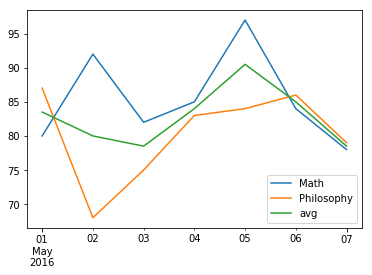

In [89]:
exam.plot()

> **Q. plot size를 어떻게 늘릴 수 있을까요?**

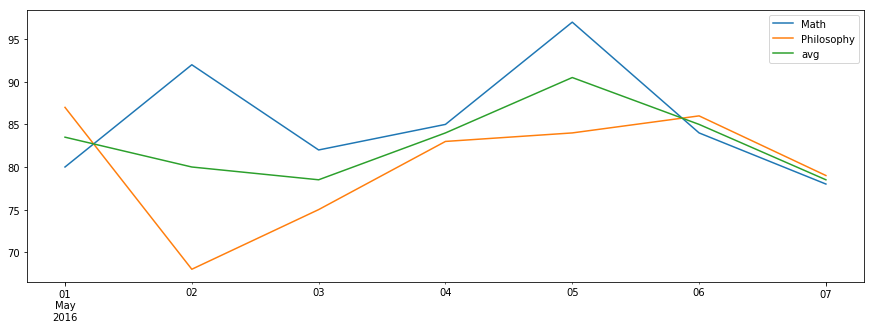

> **Q. Title, X 라벨, Y 라벨도 넣어보자.**

Text(0,0.5,'Score')

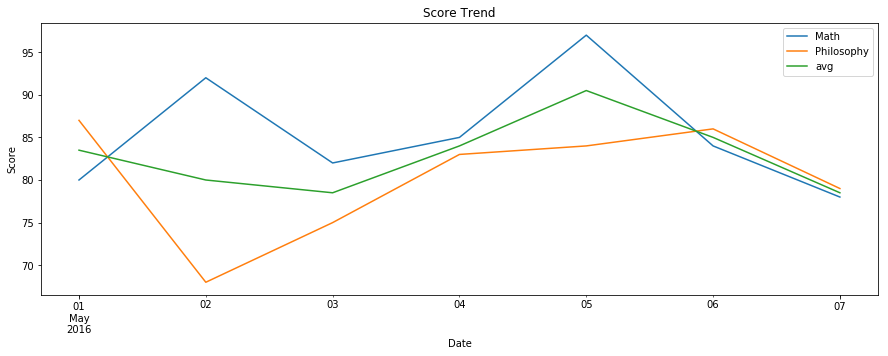

> **Q. 다른 형태의 그래프는 어떻게 그릴 수 있을까요?**

Docstring

Text(0,0.5,'Score')

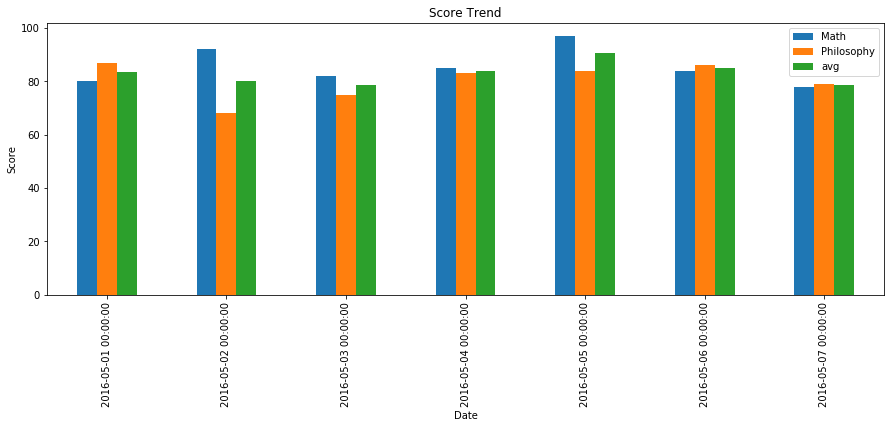

#### matplotlib
- 그래프용 라이브러리로 히스토그램, 산포도 등을 그리는데 사용된다
- 쥬피터 노트북에 결과 그래프가 나타나게 하려면 %matplotlib inline 매크로를 실행해야 한다
- (또는 matplotlib.pyplot.show 함수로 그림을 그려야 한다)

## 영화리뷰데이터 판다스로 필터링하기!

In [57]:
# IMDB 영화리뷰데이터셋을 인터넷에서 불러오기
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [58]:
# 행과 열의 수 확인
movies.shape

(979, 6)

**우리의 목표:** 영화상영시간이 200분 이상이 영화만 필터링해보자!

In [59]:
# 먼저, 영화상영시간이 200분 이상이면 true, 200분이하면 false라고 표시해주는 리스트를 생성해야함
booleans = []
for length in movies.duration:
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)

In [60]:
# 리스트에 있는 값의 수가 전체 영화수가 일치하는지 확인
len(booleans)

979

In [37]:
# 1-5번영화먼저 확인
booleans[0:5]

[False, False, True, False, False]

In [61]:
# 데이터프레임을 만들기전에 리스트를 Series로 변환
is_long = pd.Series(booleans)
is_long.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [62]:
# use bracket notation with the boolean Series to tell the DataFrame which rows to display
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
...,...,...,...,...,...,...
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [63]:
# 위과정을 아래와 깥이 간편하게도 가능함
is_long = movies.duration >= 200
movies[is_long]

# is_long을 생성하지 않고 더 간단하게!
movies[movies.duration >= 200]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
...,...,...,...,...,...,...
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


In [64]:
# Seriese에서 장르만 선택하기 
movies[movies.duration >= 200].genre

# loc내장함수를 이용하는 방법
movies.loc[movies.duration >= 200, 'genre']

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
         ...    
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, Length: 12, dtype: object

Rules for specifying **multiple filter criteria** in pandas:

- use **`&`** instead of **`and`**
- use **`|`** instead of **`or`**
- add **parentheses** around each condition to specify evaluation order

**다음목표:** 영화의 장르가 드라마이면서 상영시간이 200분이상인 영화를 필터링하자!

In [65]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration >=200) & (movies.genre == 'Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [66]:
# INCORRECT: using the '|' operator would have shown movies that are either long or dramas (or both)
movies[(movies.duration >=200) | (movies.genre == 'Drama')].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


**목표:** 이번에는 장르가 Crime' 또는 'Drama' 또는 'Action'인 영화리스트 보기!

In [67]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre == 'Crime') | (movies.genre == 'Drama') | (movies.genre == 'Action')].head(10)

# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime', 'Drama', 'Action'])].head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"


Documentation for [**`isin`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)


## 판다스로 그룹별 분석하기

In [68]:
# 각나라별 음주현황데이터 불러오기
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [69]:
# 전체 데이터의 맥주 평균 소비량
drinks.beer_servings.mean()

106.16062176165804

In [70]:
# 아프리카 대륙의 평균 소비량
drinks[drinks.continent=='Africa'].beer_servings.mean()

61.471698113207545

In [71]:
# 각 대륙별 평균 소비량
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [72]:
# 각 대륙별 최고 소비량
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [73]:
# 다양한 통계치를 한꺼번에!
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
Africa,53,61.471698,0,376
Asia,44,37.045455,0,247
Europe,45,193.777778,0,361
North America,23,145.434783,1,285
Oceania,16,89.687500,0,306
South America,12,175.083333,93,333


In [75]:
# 쥬피터 노트북에 그래프를 보이게 하려면 필수!
%matplotlib inline

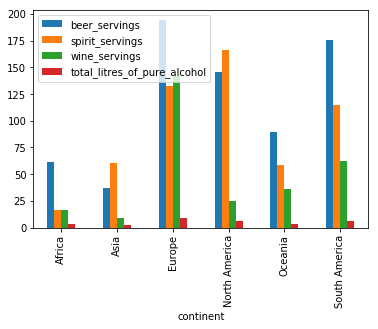

In [76]:
# 그래프를 그려보자!
drinks.groupby('continent').mean().plot(kind='bar')

## 주식데이터 분석!

In [79]:
# from 패키지.모듈 import 함수
from numpy.random import randint

In [80]:
randint(1000, 2000, size=(7, 4))

array([[1912, 1501, 1099, 1795],
       [1862, 1619, 1805, 1315],
       [1588, 1206, 1905, 1274],
       [1324, 1152, 1619, 1231],
       [1112, 1563, 1780, 1557],
       [1501, 1622, 1384, 1477],
       [1965, 1877, 1911, 1538]])

In [81]:
# pandas라는 패키지로 dummy data를 만드는 부분
import numpy as np
import pandas as pd

dates = pd.date_range('20180501', periods=7)
stocks = ['송원산업', '하림', '한라', '티엘아이']
values = np.random.randint(1000, 2000, size=(7, 4))

df = pd.DataFrame(values, index=dates, columns=stocks)
df

,송원산업,하림,한라,티엘아이
2018-05-01,1169,1243,1874,1578
2018-05-02,1118,1112,1527,1427
2018-05-03,1828,1265,1081,1280
2018-05-04,1425,1650,1185,1313
2018-05-05,1224,1007,1690,1250
2018-05-06,1003,1412,1777,1253
2018-05-07,1025,1085,1535,1305


In [82]:
# 여기서부터 작성해보세요.
df['티엘아이'][3]

1313

In [83]:
df[df['티엘아이'] == 1523]

,송원산업,하림,한라,티엘아이


In [86]:
%matplotlib inline

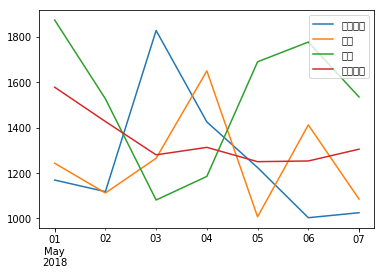

In [87]:
df.plot()

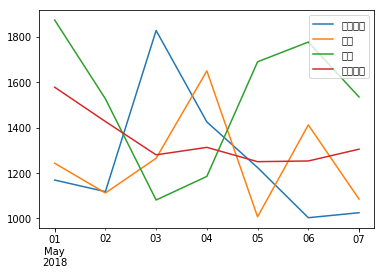

In [88]:
df.plot();

> **Q 차트 사이즈가 너무 작아요! 어떻게 해볼까요?**

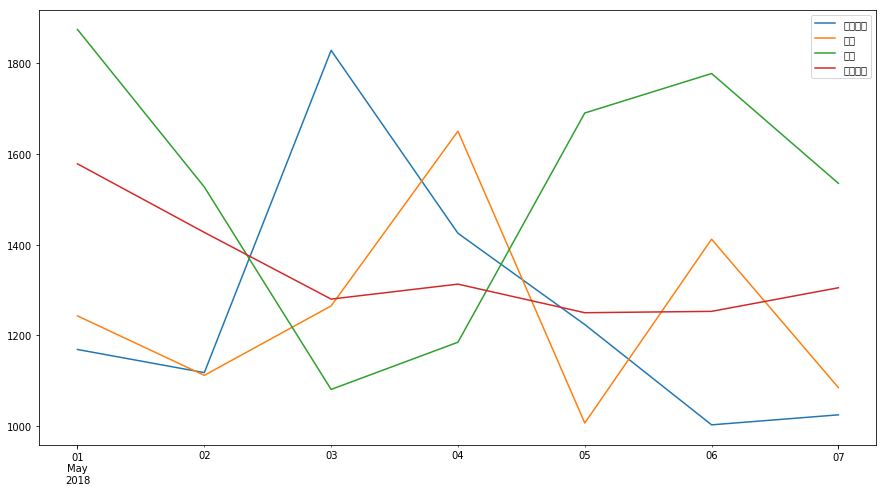

In [89]:
# 괄호 안에 파라미터값을 넣어주면 간단하게 해결됩니다. 어떤 값을 넣어야할까요? 찾아봅시다.


> **Q. 애플 주식의 거래량 증가값/증가율을 확인해보고 만약 40%이상 증가 했으면 시그널을 주는 프로그래밍을 해보자(for/if문 이용)**

> prerequisite

> 1. pandas
2. pandas-datareader
3. fix-yahoo-finance

In [95]:
!pip install fix-yahoo-finance

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python2.7/dist-packages/multitasking-0.0.7.dist-info'
Consider using the `--user` option or check the permissions.

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [96]:
!pip install pandas-datareader

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)
  Using cached https://files.pythonhosted.org/packages/cc/5c/ea5b6dcfd0f55c5fb1e37fb45335ec01cceca199b8a79339137f5ed269e0/pandas_datareader-0.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/14/f4343239f955442da9da1919a99f7311bc5627522741bada61b2349c8def/lxml-4.2.5-cp27-cp27mu-manylinux1_x86_64.whl
Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/usr/local/lib/python2.7/dist-packages/wrapt'
Consider using the `--user` option or check the permissions.

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


> **Q. 먼저 설치해야할 패키지가 위에 있습니다. 각자 설치해보도록 합시다!**

In [102]:
#에러가 나는 경우 위에 코딩셀을 추가하여 pd.core.common.is_list_like = pd.api.types.is_list_like 를 먼저 실행후 import하면 해결됨
from pandas_datareader import data
import fix_yahoo_finance as yf

#### 결과물

- 새로운 컬럼이 추가됨(diff): 전일 volume과의 증감량
- 새로운 컬럼이 추가됨(pct): 전일 volume과의 증감율
- 새로운 컬럼이 추가됨(volume_signal): 증감율이 40이상인 경우 'Over 40% UP' 출력

In [103]:
import datetime

from pandas_datareader import data  # module
import fix_yahoo_finance as yf
yf.pdr_override()

> **Q. (Jupyter Notebook 실습) 이 셀 아래에 새로운 셀을 추가해서 `fix_yahoo_finance`라는 패키지를 왜 설치하는지 적어보세요! 마크다운으로!**

fix_yahoo_finance 필요한 이유는 pandas_datareader의 yahoo api 안먹혀서. 새로 설치

In [104]:
lge = data.get_data_yahoo('005930.KS', start='2018-07-01')
lge.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,46500.0,47150.0,45500.0,45550.0,45209.816406,13112253
2018-07-03,45750.0,46450.0,45750.0,46150.0,45805.335938,10959655
2018-07-04,46700.0,47050.0,46050.0,46250.0,45904.589844,8776763
2018-07-05,46100.0,46550.0,45600.0,45950.0,45606.828125,7039773
2018-07-06,45500.0,45850.0,44650.0,44900.0,44564.671875,17843706


In [105]:
len(lge)

84

In [106]:
start = datetime.datetime(2018, 1, 1)

In [107]:
type(start)

datetime.datetime

In [108]:
lge = data.get_data_yahoo("066570.KS", start=start)  # 반환값은 pandas의 DataFrame 객체
lge.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029


In [109]:
lge['Volume'].head()  # head(): pandas의 DataFrame 객체가 갖고 있는 기능

Date
2018-01-02     948226
2018-01-03     627983
2018-01-04     977691
2018-01-05     883832
2018-01-08    2480029
Name: Volume, dtype: int64

In [110]:
type(lge['Volume'])

pandas.core.series.Series

In [111]:
lge['Volume'].diff().head()  # diff(): pandas의 DataFrame 객체가 갖고 있는 기능

Date
2018-01-02          NaN
2018-01-03    -320243.0
2018-01-04     349708.0
2018-01-05     -93859.0
2018-01-08    1596197.0
Name: Volume, dtype: float64

In [112]:
lge['diff'] = lge['Volume'].diff()  # 새로운 컬럼 'diff'에 diff 반환값을 할당

In [113]:
lge.head()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226,NaN
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983,-320243.0
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691,349708.0
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832,-93859.0
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029,1596197.0


pip install --user numexpr

In [114]:
pct = (lge['diff'] / lge['Volume']) * 100

In [115]:
pct

Date
2018-01-02          NaN
2018-01-03   -50.995489
2018-01-04    35.768765
2018-01-05   -10.619552
2018-01-08    64.362030
                ...    
2018-10-29   -34.774512
2018-10-30    15.777507
2018-10-31     1.075110
2018-11-01    22.366937
2018-11-02   -33.188082
Length: 205, dtype: float64

In [116]:
lge['pct'] = pct

In [117]:
lge.head()

,Open,High,Low,Close,Adj Close,Volume,diff,pct
Date,,,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226,NaN,NaN
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983,-320243.0,-50.995489
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691,349708.0,35.768765
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832,-93859.0,-10.619552
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029,1596197.0,64.362030


> **소수점 이하 숫자가 너무 많습니다! 소수점 둘째자리까지 구해보겠습니다.**

In [118]:
lge['pct'] = round(pct, 2)

In [119]:
lge.tail()

,Open,High,Low,Close,Adj Close,Volume,diff,pct
Date,,,,,,,,
2018-10-29,60900.0,61900.0,59100.0,59400.0,59400.0,683052,-237528.0,-34.77
2018-10-30,58800.0,61700.0,58800.0,61200.0,61200.0,811009,127957.0,15.78
2018-10-31,61500.0,63800.0,61000.0,63300.0,63300.0,819823,8814.0,1.08
2018-11-01,63700.0,66500.0,63400.0,66000.0,66000.0,1056023,236200.0,22.37
2018-11-02,66600.0,67700.0,66200.0,67200.0,67200.0,792881,-263142.0,-33.19


> **Q. 지금까지 만든 lge 데이터프레임의 데이터를 잠깐 위에 몇 개만 확인해보세요. 위에서 이미 했었죠?**

In [120]:
# 여기에 작성해보세요.
lge.head()

,Open,High,Low,Close,Adj Close,Volume,diff,pct
Date,,,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226,NaN,NaN
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983,-320243.0,-51.00
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691,349708.0,35.77
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832,-93859.0,-10.62
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029,1596197.0,64.36


> **! 지금까지 한 작업을 유식한 말로 Feature Engineering 이라고 합니다! 머신러닝할 때 많이 사용하는 기법이죠~**

> **유의미하게 생각되는 데이터를 있는 데이터 안에서 새롭게 만들어내는 방법을 말합니다!**

In [121]:
lge.head()

,Open,High,Low,Close,Adj Close,Volume,diff,pct
Date,,,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226,NaN,NaN
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983,-320243.0,-51.00
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691,349708.0,35.77
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832,-93859.0,-10.62
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029,1596197.0,64.36


In [122]:
len(lge)

205

> **!? 이제 다 했지만 왜 for 반복문을 사용하는 것인가 ?!**

> **여러 개의 데이터가 있는 위 데이터프레임에서 pct 값을 하나씩 하나씩 가져와서 40% 이상인지 아닌지 따져야 하는 작업일 땐... for 문이 필요합니다!**

> **DataFrame의 여러 행에서 한 개 행씩 가져와서 pct의 값이 40이 넘는지 따져보고 넘으면 새로운 리스트에 추가해보도록 합시다.**

#### 개발 방법

1. 새로운 컬럼에 넣을 새로운 데이터를 만드는 방법: `새로운 list를 만들어 list에 값을 하나씩 추가한다.`
    - `새로운리스트 = []`
    - `새로운리스트.append(넣을 값)`
2. 만들어진 list를 새로운 컬럼에 넣는 방법: `lge['새롭게 추가할 컬럼 이름'] = 새롭게 만든 list`

In [123]:
volume_signal = []  # list
percentages = lge['pct']  # 증감율 데이터

In [124]:
percentages.head(10)

Date
2018-01-02      NaN
2018-01-03   -51.00
2018-01-04    35.77
2018-01-05   -10.62
2018-01-08    64.36
2018-01-09   -78.72
2018-01-10   -52.66
2018-01-11   -14.80
2018-01-12     3.85
2018-01-15   -18.41
Name: pct, dtype: float64

In [125]:
# 아래부터 작성해보세요.






In [126]:
lge.head(20)

,Open,High,Low,Close,Adj Close,Volume,diff,pct,volume_signal
Date,,,,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226,NaN,NaN,-
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983,-320243.0,-51.00,-
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691,349708.0,35.77,-
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832,-93859.0,-10.62,-
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029,1596197.0,64.36,Over 40% Up
...,...,...,...,...,...,...,...,...,...
2018-01-23,107500.0,110000.0,103500.0,109500.0,109500.0,1166939,697396.0,59.76,Over 40% Up
2018-01-24,107500.0,108500.0,102000.0,102500.0,102500.0,1406328,239389.0,17.02,-
2018-01-25,102500.0,104500.0,101000.0,103500.0,103500.0,899675,-506653.0,-56.32,-


In [65]:
# Solution


In [127]:
volume_signal

['-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 '-',
 'Over 40% Up',
 '-'

In [128]:
lge['volume_signal'] = volume_signal  # 할당

In [129]:
lge.head()

,Open,High,Low,Close,Adj Close,Volume,diff,pct,volume_signal
Date,,,,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226,NaN,NaN,-
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983,-320243.0,-51.00,-
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691,349708.0,35.77,-
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832,-93859.0,-10.62,-
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029,1596197.0,64.36,Over 40% Up


> **! apply 메소드를 사용하는 방법도 있습니다! 이것은 pandas가 익숙해지면 많이 사용하게 될거에요!**

In [130]:
def get_signal(pct):
    if pct >= 40:
        return 'Over'
    return ''

In [131]:
lge['new'] = lge['pct'].apply(lambda x: get_signal(x))

In [132]:
lge.head()

,Open,High,Low,Close,Adj Close,Volume,diff,pct,volume_signal,new
Date,,,,,,,,,,
2018-01-02,106500.0,111000.0,105500.0,109500.0,109500.0,948226,NaN,NaN,-,
2018-01-03,109500.0,110500.0,107500.0,109500.0,109500.0,627983,-320243.0,-51.00,-,
2018-01-04,110500.0,111000.0,105000.0,106000.0,106000.0,977691,349708.0,35.77,-,
2018-01-05,106000.0,111500.0,106000.0,111000.0,111000.0,883832,-93859.0,-10.62,-,
2018-01-08,113500.0,114000.0,103500.0,105000.0,105000.0,2480029,1596197.0,64.36,Over 40% Up,Over


> **! 해본 김에 간단한 그림도 그려볼까요!**

In [133]:
%autosave 1

Autosaving every 1 seconds


In [134]:
%matplotlib inline

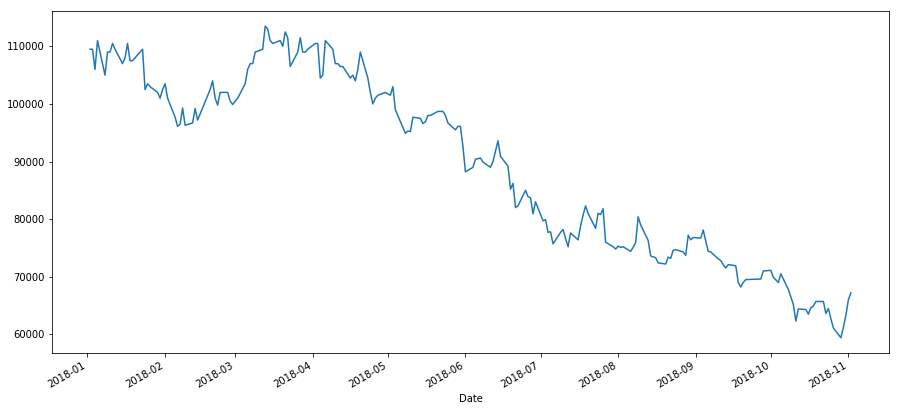

In [135]:
lge['Adj Close'].plot(figsize=(15, 7))

> **Q. 해본 김에!! 차트에 title도 넣어볼까요? 가르쳐 드리진 않았지만 직접 생각해보고 찾아보세요! 어렵지 않습니다!**

> Jupyter Notebook에서는 잘 모르는 우리를 위해 기능을 찾아볼 수 있도록 Shift+Tab이란 기능을 마련해주었습니다!!!!

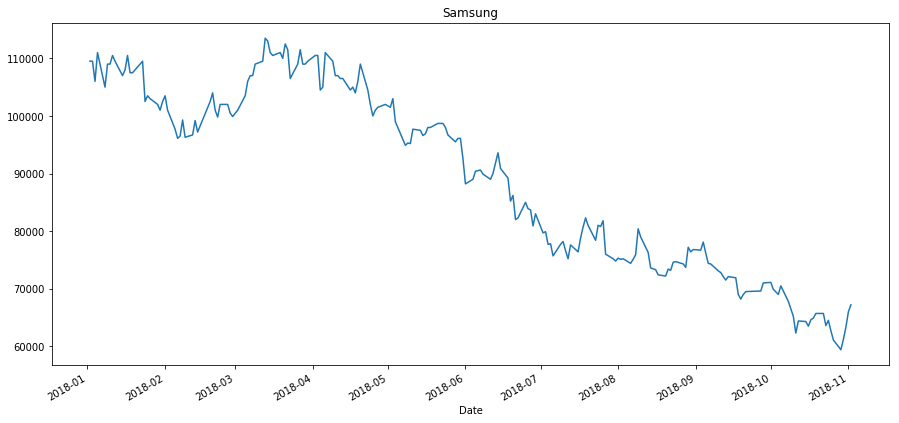

In [136]:
lge['Adj Close'].plot(figsize=(15, 7), title='Samsung')

> **Q. 각자 원하는 주식 코드(Quote)를 찾아서 위와 같은 그림을 그려보아요!**

> http://finance.naver.com/에서 찾아볼 수 있습니다.

In [ ]:
#여기에 코딩을 작성하세요












